In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from math import isclose
import statistics

# Import Data

In [10]:
df = pd.read_csv("data.csv")

In [11]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Let's get to know our data
We will see if there's any impractical data, and if so, clean them up. 

In [12]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [13]:
df.shape

(569, 33)

In [14]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

## Cleaning up

In [15]:
df = df.drop(["Unnamed: 32"], axis=1)
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [16]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### No NULL data, which is great!

In [17]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [18]:
df['id'].is_unique

True

In [19]:
#change our index to the ID column
df.set_index("id")

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [20]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## Write a function to divide our dataset
We can classify the attributes in our dataset to 4: diagnosis, mean, standard error, and worst. "Worst" or largest mean value for mean of distances from center to points on the perimeter. 

Here, there is a written function to help us divide the dataset into smaller chunks, if we need to work with only "mean" attributes and so on.

In [21]:
def divide_df(dataframe, ending):
    d = pd.DataFrame()
    length = len(ending)
    for column in dataframe.columns:
        if ending in column[-length:]:
            d[column] = df[column]
    d["diagnosis"] = df["diagnosis"]
    return d

In [22]:
divide_df(df, "mean")

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,M
...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,M


In [23]:
df_mean = divide_df(df, "mean").groupby("diagnosis").mean()
df_mean

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680


# Let's see the distribution of compactness and radius mean by diagnosis.

In [24]:
radius = df.groupby("diagnosis").mean()["radius_mean"]
radius

diagnosis
B    12.146524
M    17.462830
Name: radius_mean, dtype: float64

In [25]:
compactness = df.groupby("diagnosis").mean()["compactness_mean"]
compactness

diagnosis
B    0.080085
M    0.145188
Name: compactness_mean, dtype: float64

<Axes: xlabel='diagnosis'>

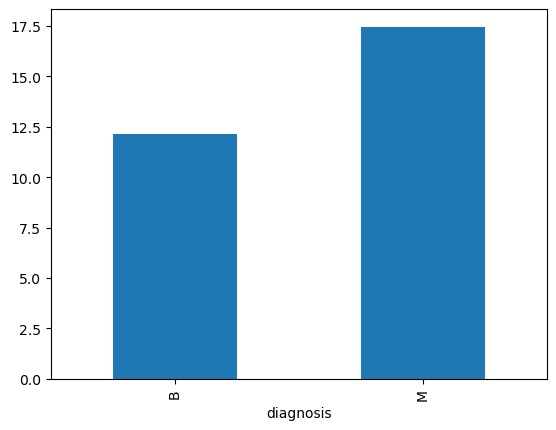

In [26]:
radius.plot.bar()

<Axes: xlabel='diagnosis'>

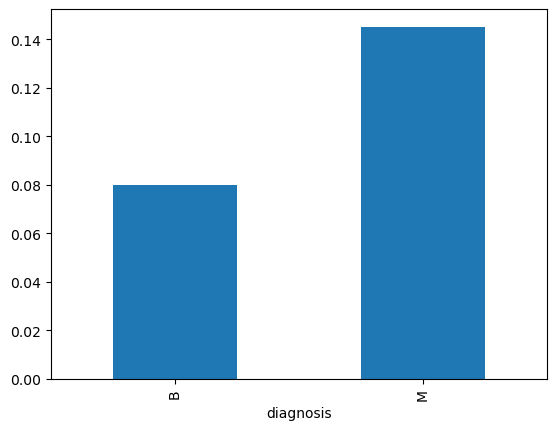

In [27]:
compactness.plot.bar()

# Are all variables > in Malignant than Benign? Let's check.

In [28]:
mean = df.groupby("diagnosis").mean().drop(["id"], axis=1)
mean

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [29]:
larger_benign = []
for column in mean.columns:
    if mean[column][1] > mean[column][0]:
        continue
    else:
        print(mean[column], "\n")
        larger_benign.append(column)

diagnosis
B    0.062867
M    0.062680
Name: fractal_dimension_mean, dtype: float64 

diagnosis
B    1.220380
M    1.210915
Name: texture_se, dtype: float64 

diagnosis
B    0.007196
M    0.006780
Name: smoothness_se, dtype: float64 

diagnosis
B    0.020584
M    0.020472
Name: symmetry_se, dtype: float64 



In [30]:
larger_benign

['fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se']

# Values that are close to each other

In [31]:
close_list = []
for column in mean.columns:
    if math.isclose(mean[column][1], mean[column][0], rel_tol=0.09):
        print(mean[column], "\n")
        close_list.append(column)
    else:
        continue

diagnosis
B    0.062867
M    0.062680
Name: fractal_dimension_mean, dtype: float64 

diagnosis
B    1.220380
M    1.210915
Name: texture_se, dtype: float64 

diagnosis
B    0.007196
M    0.006780
Name: smoothness_se, dtype: float64 

diagnosis
B    0.020584
M    0.020472
Name: symmetry_se, dtype: float64 



In [32]:
close_list

['fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se']

# Let's compare these values by their graphs.

<Axes: xlabel='fractal_dimension_mean', ylabel='diagnosis'>

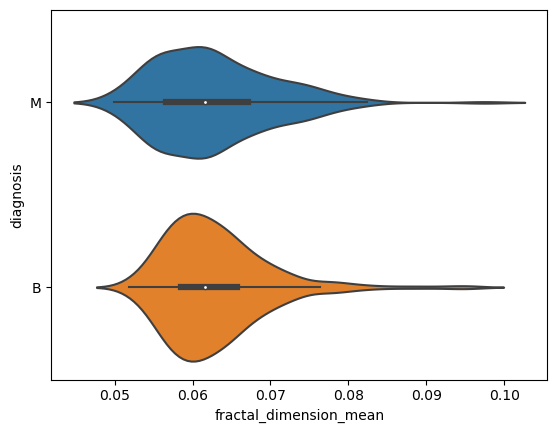

In [46]:
sns.violinplot(x=df["fractal_dimension_mean"], y=df["diagnosis"])

# Values that are farthest from each other

In [36]:
diff_dic = {}
for column in mean.columns:
    diff = abs(mean[column][1] - mean[column][0])
    diff_dic[column] = diff

diff_dic

{'radius_mean': 5.316306379155435,
 'texture_mean': 3.6901437556154555,
 'perimeter_mean': 37.289971196025576,
 'area_mean': 515.5862190159082,
 'smoothness_mean': 0.010420843507214214,
 'compactness_mean': 0.06510316117012843,
 'concavity_mean': 0.11471709597272872,
 'concave points_mean': 0.062272593837535015,
 'symmetry_mean': 0.018722967866391854,
 'fractal_dimension_mean': 0.00018730061836055856,
 'radius_se': 0.3250001942286348,
 'texture_se': 0.00946548940330838,
 'perimeter_se': 2.3236079567676122,
 'area_se': 51.537257200993594,
 'smoothness_se': 0.0004158076211616714,
 'compactness_se': 0.010842918595740186,
 'concavity_se': 0.015827273859732573,
 'concave points_se': 0.005202819037048782,
 'symmetry_se': 0.00011140577929284745,
 'fractal_dimension_se': 0.00042635439987315704,
 'radius_worst': 7.755010200306538,
 'texture_worst': 5.803137519158611,
 'perimeter_worst': 54.36439181332911,
 'area_worst': 863.3868809788066,
 'smoothness_worst': 0.01988574005073729,
 'compactness_

In [37]:
max(diff_dic)

'texture_worst'

# Let's see it in a graph

<Axes: xlabel='texture_worst', ylabel='diagnosis'>

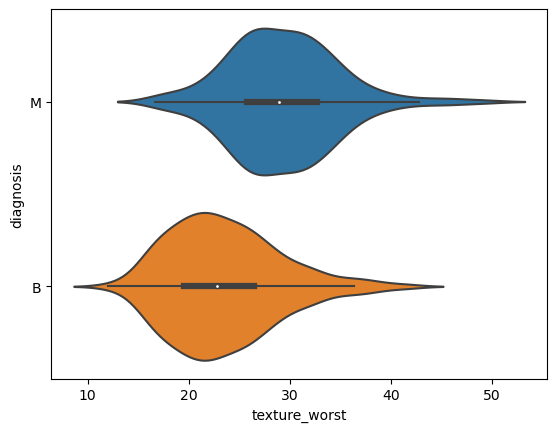

In [45]:
sns.violinplot(x=df["texture_worst"], y=df["diagnosis"])

# Standard deviation

In [41]:
std_dev = {}
for column in mean.columns:
    dev = statistics.stdev(mean[column])
    std_dev[column] = dev
std_dev 

{'radius_mean': 3.759196291566109,
 'texture_mean': 2.6093256731488825,
 'perimeter_mean': 26.367991502960717,
 'area_mean': 364.57451175248116,
 'smoothness_mean': 0.007368649109634975,
 'compactness_mean': 0.046034886740078544,
 'concavity_mean': 0.08111723648034445,
 'concave points_mean': 0.04403337338459662,
 'symmetry_mean': 0.013239137542263505,
 'fractal_dimension_mean': 0.0001324415373631845,
 'radius_se': 0.22980984122601272,
 'texture_se': 0.006693111744328763,
 'perimeter_se': 1.6430389430493968,
 'area_se': 36.4423440505778,
 'smoothness_se': 0.0002940203885924648,
 'compactness_se': 0.007667101266901603,
 'concavity_se': 0.011191572673913484,
 'concave points_se': 0.003678948622383657,
 'symmetry_se': 7.87757820013443e-05,
 'fractal_dimension_se': 0.00030147808733903026,
 'radius_worst': 5.483620300807599,
 'texture_worst': 4.103437891955132,
 'perimeter_worst': 38.44143010628744,
 'area_worst': 610.5067183276168,
 'smoothness_worst': 0.014061341638789256,
 'compactness_w

# Attribute with the max std. dev.

In [42]:
max(std_dev)

'texture_worst'

<Axes: xlabel='texture_worst', ylabel='diagnosis'>

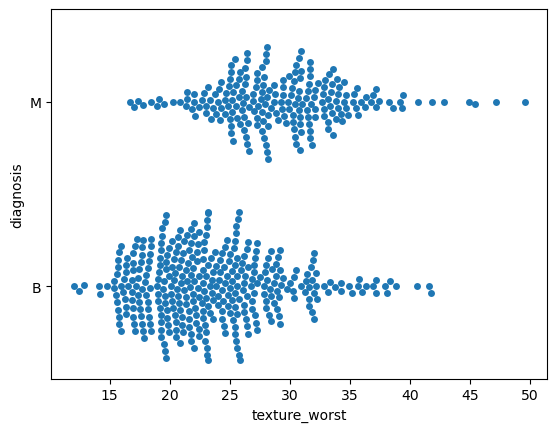

In [44]:
sns.swarmplot(x=df["texture_worst"], y=df["diagnosis"])

# Attribute with the min std. dev

In [85]:
min(std_dev)

'area_mean'

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 40.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='area_mean', ylabel='diagnosis'>

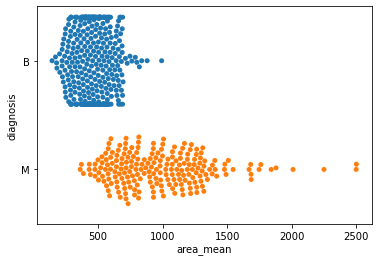

In [95]:
sns.swarmplot(df["area_mean"], df["diagnosis"])

# Corrolations in our dataset

In [28]:
divide_df(df, "mean").corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


<AxesSubplot:>

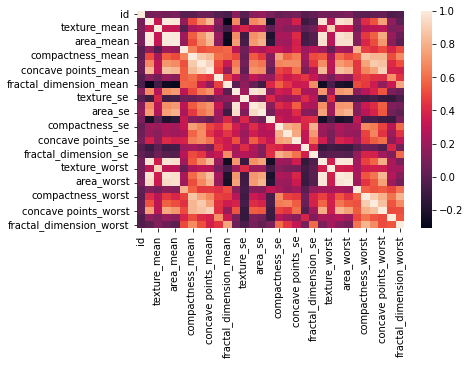

In [30]:
sns.heatmap(df.corr())

In [53]:
df.corr(numeric_only=True)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


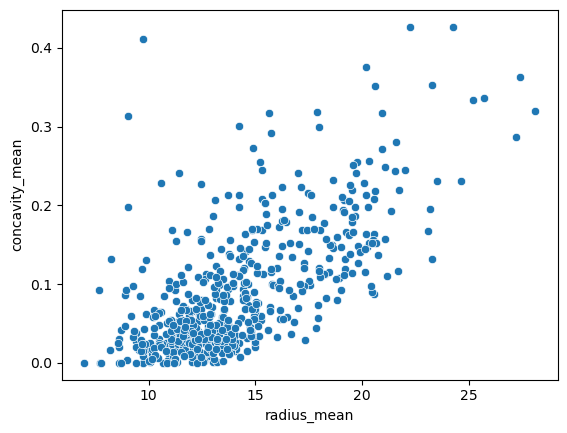

In [54]:
fig, ax = plt.subplots()
sns.scatterplot(data=df, x=df["radius_mean"], y=df["concavity_mean"], ax=ax)

plt.show()

# Machine Learning Model

In [78]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# we want to convert categorical data into numerical data
df = pd.get_dummies(df, drop_first=True)


# we want to predict the if malignant (1) or not (0)
X = df.drop(["diagnosis_M"], axis=1)
y = df["diagnosis_M"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print(score)

gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.02, max_depth=4) #loss="ls"
gbm.fit(X_train, y_train)

0.9473684210526315


GradientBoostingRegressor(learning_rate=0.02, max_depth=4)

In [73]:
# model evaluation
y_pred = gbm.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE on Test Set: ", mse)
print("R^2 on Test Set: ", r2)

# model evaluation
y_pred = gbm.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
print("MSE on Train Set: ", mse)
print("R^2 on Train Set: ", r2)

MSE on Test Set:  0.03801631398427693
R^2 on Test Set:  0.8366203649009051
MSE on Train Set:  0.004601422275586724
R^2 on Train Set:  0.9803382983157205


# XAI Methods
### SHAP

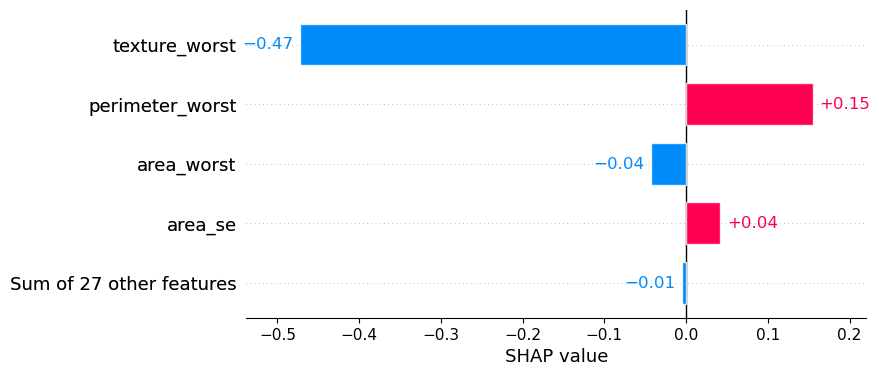

In [86]:
import shap

explainer = shap.Explainer(gbm)

shap_values = explainer(X_test)

shap.plots.bar(shap_values[0], max_display=5)

### LIME

In [87]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['malignant', 'benign'],
    mode='classification')

In [90]:
exp = explainer.explain_instance(data_row=X_test.iloc[54], predict_fn=model.predict_proba)

exp.show_in_notebook(show_table=True)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
